## 1. Import Libraries

In [24]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor

from sklearn.model_selection import train_test_split,cross_val_score,KFold
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor, cv
from sklearn.model_selection import GridSearchCV


from sklearn.metrics import classification_report,accuracy_score, confusion_matrix, mean_squared_error, make_scorer, mean_absolute_error, mean_absolute_percentage_error

## 2. Merge all trip_metrics

In [25]:
# read the file if they have not merged yet

# trip_metrics_1 = pd.read_csv("../Yeni dosyalar/trip_metrics_1-6.csv")
# trip_metrics_2 = pd.read_csv("../Yeni dosyalar/trip_metrics_7-12.csv")
# trip_metrics_3 = pd.read_csv("../Yeni dosyalar/trip_metrics_13-18.csv")
# trip_metrics_4 = pd.read_csv("../Yeni dosyalar/trip_metrics_19-24.csv")
# trip_metrics_5 = pd.read_csv("../Yeni dosyalar/trip_metrics_25-30.csv")

# df_list = [trip_metrics_1,trip_metrics_2,trip_metrics_3,trip_metrics_4,trip_metrics_5]
# trips_merged = pd.concat(df_list)
# # trips_merged.to_csv('trips_merged.csv',index=False)



In [26]:
# # if you have all data just use this method
trips_merged = pd.read_csv("trips_merged.csv")
trips_merged

,ID,Energy_Consumption_kWh,Start_Time,End_Time,Duration_s,Average_Speed_kmh,Total_Distance_km,City_Name,Max_Speed,Min_Speed,...,Max_Altitude-diff,Min_Altitude-diff,Max_Altitude,Min_Altitude,GPS_Altitude_Mean,Average_Ambient_Temperature,Average_air,Characteristic_Acceleration,Kinetic_Intensity,Traffic_Category_Mean
0,vehicle_106_2013-01-02_trip_1,49.808978,2013-01-02 17:03:03,2013-01-02 23:01:16,21493,2.360999,14.095821,New York,85.29502,0.0,...,141.0,-36.0,186.0,0.0,31.439192,-1.630595,2543.015725,0.008343,0.000067,1.987904
1,vehicle_106_2013-01-02_trip_2,0.046400,2013-01-03 00:32:29,2013-01-03 00:33:34,65,0.000000,0.000000,New York,0.00000,0.0,...,0.0,-1.0,30.0,29.0,29.060606,4.000000,2499.651515,-inf,NaN,1.000000
2,vehicle_106_2013-01-02_trip_3,17.837048,2013-01-03 04:38:03,2013-01-03 06:59:37,8494,7.062909,16.664542,New York,48.28020,0.0,...,28.0,-20.0,59.0,0.0,16.777634,1.608240,2530.378340,0.006475,0.000172,2.689935
3,vehicle_106_2013-01-03_trip_1,11.895772,2013-01-03 07:00:39,2013-01-03 08:30:55,5416,5.218145,7.850409,New York,64.37360,0.0,...,38.0,-5.0,92.0,2.0,43.463725,1.625696,2532.115193,-0.057436,-0.000621,3.000000
4,vehicle_106_2013-01-03_trip_2,0.147490,2013-01-03 09:24:15,2013-01-03 09:26:51,156,0.102506,0.004442,New York,3.21868,0.0,...,1.0,-1.0,29.0,25.0,26.573248,2.235669,2495.414013,-2.206256,-9.538746,3.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61352,vehicle_441_2015-01-10_trip_6,3.652813,2015-01-10 22:13:18,2015-01-10 22:24:12,654,19.997585,3.632895,New Jersey,56.32690,0.0,...,14.0,-6.0,68.0,8.0,33.638168,-8.116031,NaN,-0.105205,-0.000809,1.000000
61353,vehicle_441_2015-01-10_trip_7,0.118821,2015-01-10 22:55:34,2015-01-10 22:57:07,93,1.523737,0.039363,New Jersey,12.87472,0.0,...,23.0,-5.0,44.0,15.0,23.627660,-8.000000,NaN,0.746890,0.197058,1.000000
61354,vehicle_441_2015-01-10_trip_8,17.988823,2015-01-10 23:19:55,2015-01-11 00:05:32,2737,26.445371,20.105828,New Jersey,74.02964,0.0,...,2.0,-9.0,54.0,1.0,27.613587,-7.542001,NaN,0.011211,0.000064,1.000000
61355,vehicle_441_2015-01-11_trip_1,0.299584,2015-01-12 04:58:17,2015-01-12 04:59:53,96,9.938089,0.265016,New Jersey,22.53076,0.0,...,1.0,-1.0,41.0,31.0,36.731959,2.721649,NaN,-0.110937,-0.004504,1.000000


## 3. Feature Enginnering

In [27]:
trips_merged = trips_merged.rename(columns={"City_Name": "State_Name"})

In [28]:
#TAKING START HOUR AND END HOUR
trips_merged['Start_Time'] = pd.to_datetime(trips_merged['Start_Time'])
trips_merged['End_Time'] = pd.to_datetime(trips_merged['End_Time'])

trips_merged['Start_Hour'] = trips_merged['Start_Time'].dt.hour
trips_merged['End_Hour'] = trips_merged['End_Time'].dt.hour

In [29]:
trips_merged['Season'] = trips_merged['Start_Time'].dt.month.apply(
                        lambda month: 'Spring' if 3 <= month <= 5 
                        else 'Summer' if 6 <= month <= 8       
                        else 'Fall' if 9 <= month <= 11      
                        else 'Winter')    

In [30]:
# handling the energy consumption values by dropping rows with value 0 and takinbg absolute value to remove negative consumptions
ENERGY_NAME = 'Energy_Consumption_kWh'

# trips_merged['Energy_Consumption_kWh'] = trips_merged['Energy_Consumption_kWh'] / trips_merged['Total_Distance_km']

trips_merged = trips_merged.rename(columns={"Energy_Consumption_kWh": ENERGY_NAME})
trips_merged = trips_merged[trips_merged[ENERGY_NAME] >=-50]

In [31]:
state_dict = ['内蒙古自治区','Алматы облысы','Pays de la Loire','Comunitat Valenciana','Naâma ⵏⵄⴰⵎⴰ النعامة',
              'Castilla-La Mancha', 'Aragón', '河南省', 'Centre-Val de Loire','Occitanie', 'Salzburg', None, 'Kansas', 'Nevada','Colorado','Michigan','Nebraska','Wisconsin']
trips_merged['State_Name']  = trips_merged['State_Name'].replace(state_dict, 'Unknown')
trips_merged['State_Name'].unique()

array(['New York', 'Unknown', 'Indiana', 'Missouri', 'California',
       'Washington', 'Arizona', 'Maryland', 'District of Columbia',
       'New Jersey', 'Illinois', 'Virginia'], dtype=object)

## 4. Splitting the data to train test

In [32]:
trips_merged = trips_merged.dropna()

In [33]:
trips_merged = trips_merged[trips_merged['Total_Distance_km'] >= 5]
trips_merged = trips_merged[trips_merged['Total_Distance_km'] < 75]

In [34]:
cols_to_keep = ['Duration_s', 'Average_Speed_kmh', 'Max_Speed','Start_Hour','End_Hour',
       'Positive_Acceleration_Mean', 'Positive_Acceleration_Sum',
       'Positive_Altitude-diff_Mean', 'Positive_Altitude-diff_Sum',
       'Max_Altitude-diff', 'Max_Altitude','Season','State_Season',
       'Min_Altitude', 'GPS_Altitude_Mean', 'Average_Ambient_Temperature',
       'Average_air', 'Kinetic_Intensity', 'Traffic_Category_Mean',
       'State_Name','Total_Distance_km']

In [35]:
trips_merged['State_Season'] = trips_merged['State_Name'] +'-' + trips_merged['Season'] #for stratification in terms of season and state
X = trips_merged[cols_to_keep]
y = trips_merged[ENERGY_NAME]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=55, stratify=X['State_Season'])
X_train = X_train.drop(['State_Season'], axis=1)
X_test = X_test.drop(['State_Season'], axis=1)
X = X.drop(['State_Season'], axis=1)

## Explatory Data Analysis

In [36]:
#merging energy consumption to another df to visualzie the train data better. This df_train will not be used in models
df_train = X_train.copy()
df_train[ENERGY_NAME] = y_train

<Axes: >

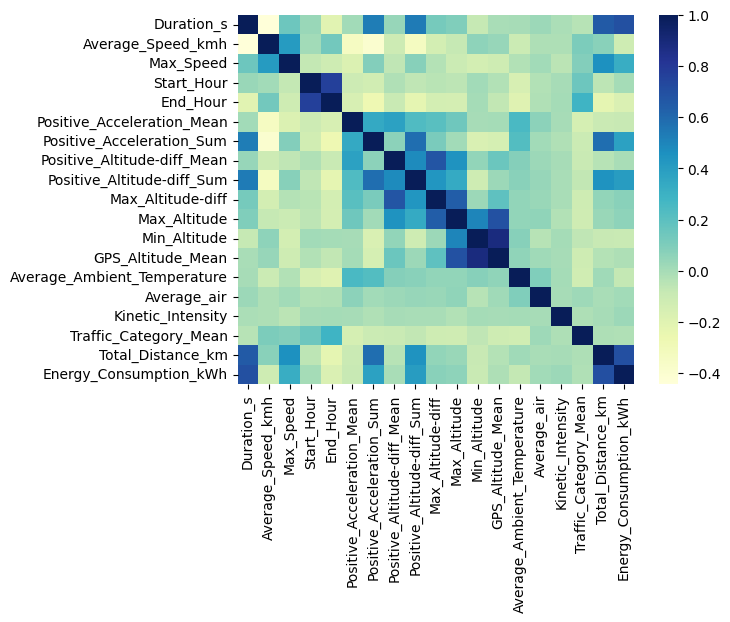

In [37]:
sns.heatmap(df_train.drop(columns=["State_Name",'Season']).corr(), cmap="YlGnBu")

<Axes: >

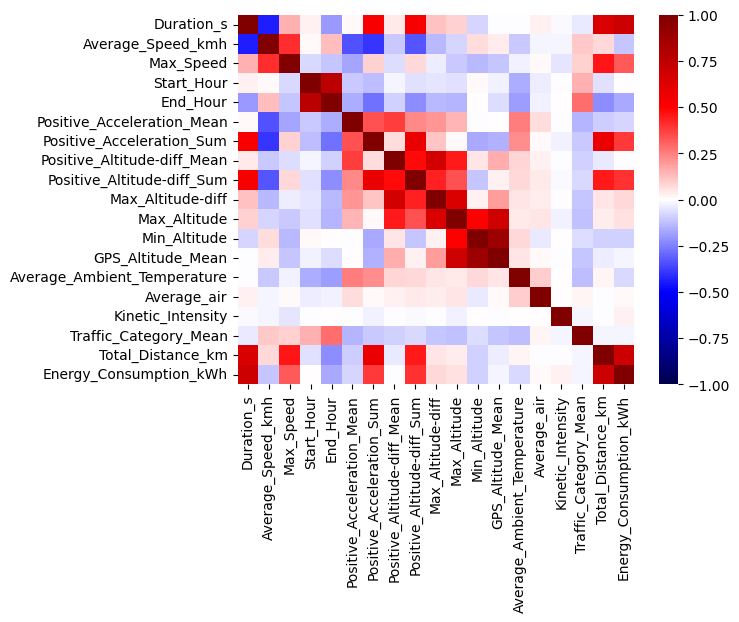

In [38]:
vmin = -1
vmax = 1
cmap = sns.color_palette(["red", "white", "green"])
sns.heatmap(df_train.drop(columns=["State_Name",'Season']).corr(), cmap = "seismic" ,center=0,  fmt=".1f", vmin=vmin, vmax=vmax,)

<Axes: >

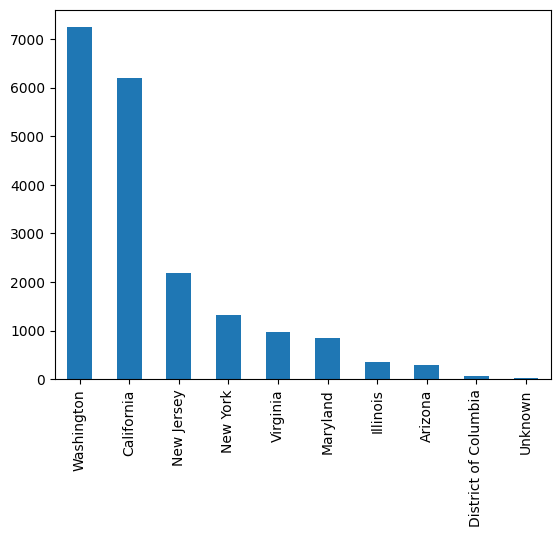

In [39]:
df_train['State_Name'].value_counts().head(10).plot.bar()

<Axes: >

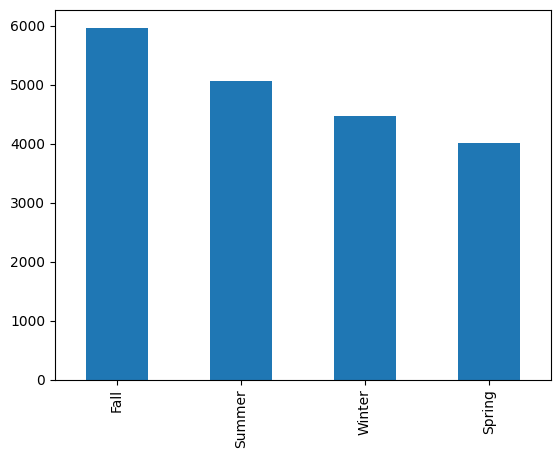

In [40]:
df_train['Season'].value_counts().plot.bar()

<Axes: >

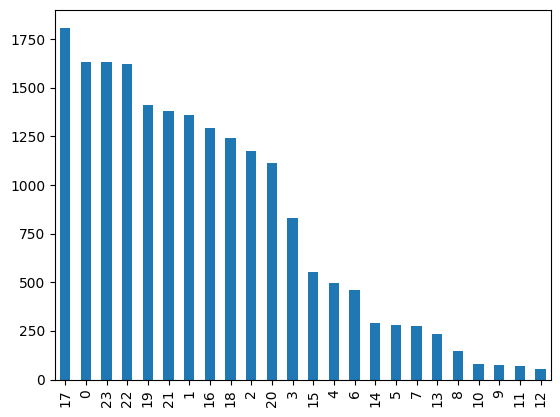

In [41]:
df_train['Start_Hour'].value_counts().plot.bar()

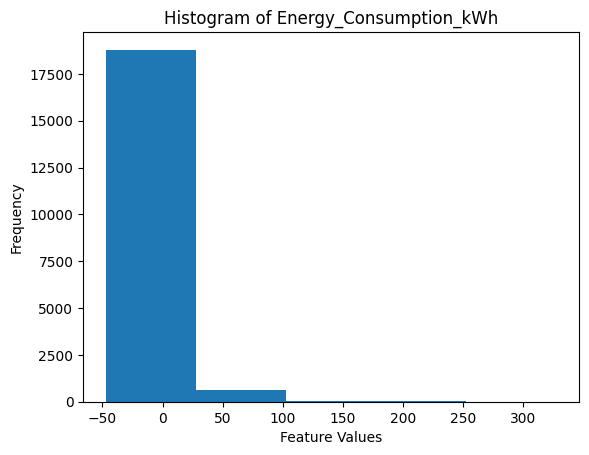

In [68]:
fig, ax = plt.subplots()
# Set the range of the x-axis
x_min = -50 # Specify the minimum value
x_max = 150  # Specify the maximum  value

# Plot the histogram
ax.hist(df_train[ENERGY_NAME], bins=5)  # You can adjust the number of bins as per your preference

# Set labels and title
ax.set_xlabel('Feature Values')
ax.set_ylabel('Frequency')
ax.set_title('Histogram of ' + ENERGY_NAME)

# Show the plot
plt.show()

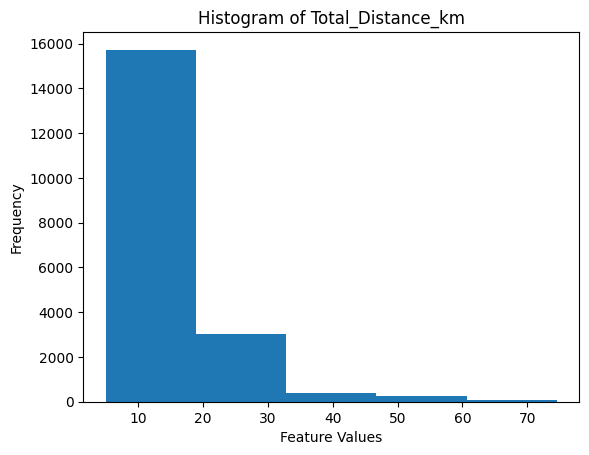

In [55]:
fig, ax = plt.subplots()

# Plot the histogram
ax.hist(df_train['Total_Distance_km'], bins=5)  # You can adjust the number of bins as per your preference

# Set labels and title
ax.set_xlabel('Feature Values')
ax.set_ylabel('Frequency')
ax.set_title('Histogram of Total_Distance_km')

# Show the plot
plt.show()

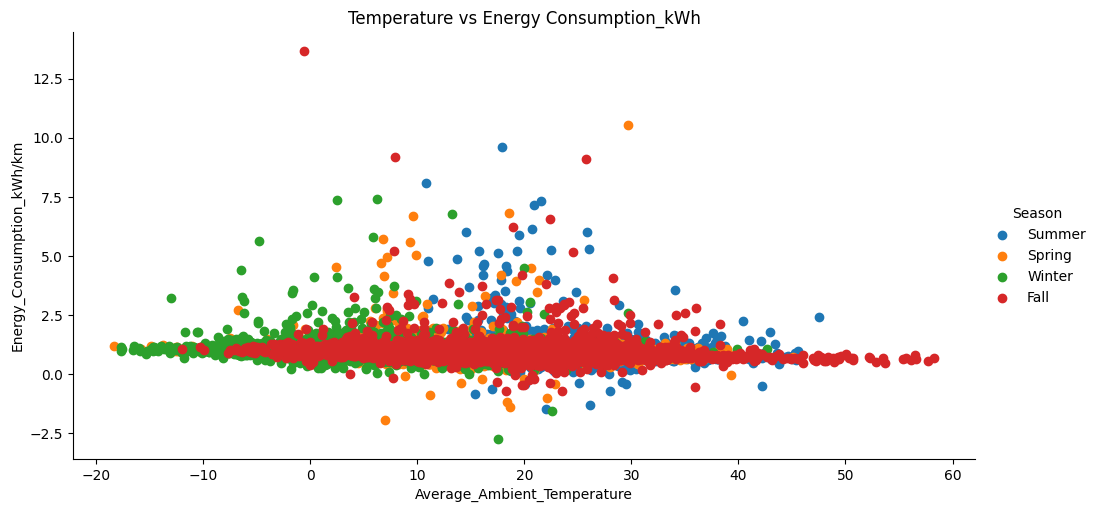

In [124]:
sns.FacetGrid(df_train, hue="Season", height=5, aspect=2) \
   .map(plt.scatter, "Average_Ambient_Temperature", ENERGY_NAME) \
   .add_legend().set(title='Temperature vs Energy Consumption_kWh')

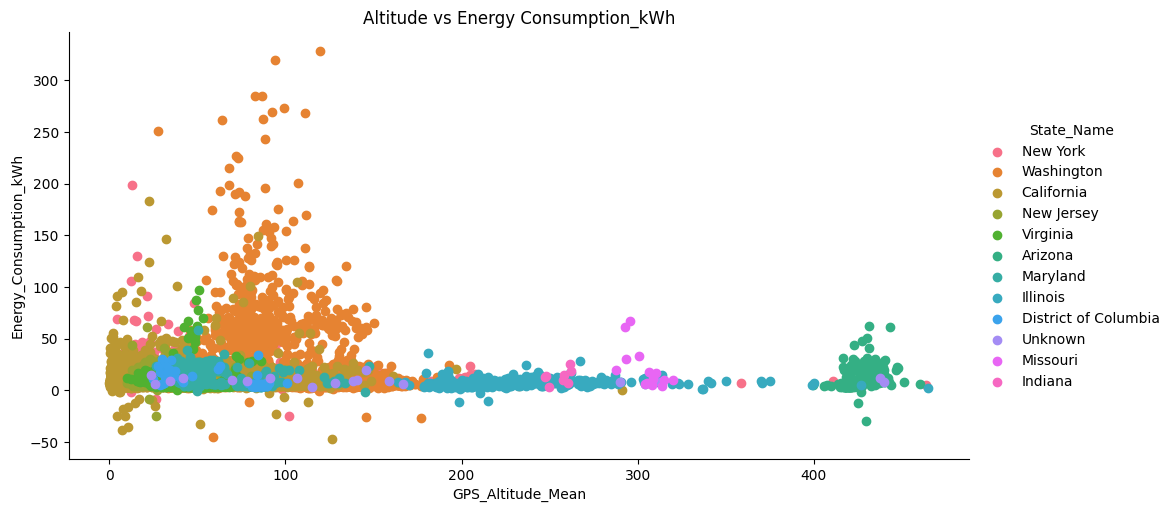

In [59]:
sns.FacetGrid(df_train, hue="State_Name", height=5, aspect=2) \
   .map(plt.scatter, "GPS_Altitude_Mean",ENERGY_NAME) \
   .add_legend().set(title='Altitude vs Energy Consumption_kWh')

In [126]:
df_train.columns

Index(['Duration_s', 'Average_Speed_kmh', 'Max_Speed', 'Start_Hour',
       'End_Hour', 'Positive_Acceleration_Mean', 'Positive_Acceleration_Sum',
       'Positive_Altitude-diff_Mean', 'Positive_Altitude-diff_Sum',
       'Max_Altitude-diff', 'Max_Altitude', 'Season', 'Min_Altitude',
       'GPS_Altitude_Mean', 'Average_Ambient_Temperature', 'Average_air',
       'Kinetic_Intensity', 'Traffic_Category_Mean', 'State_Name',
       'Total_Distance_km', 'Energy_Consumption_kWh/km'],
      dtype='object')

 ## 5. BaseLine Classifier

### 5.1 Baseline for all model

In [127]:
#This part was not in the feature engineering part as we have to startify our train test split according to city names so this part should come after that
X_train = pd.get_dummies(X_train, columns=['State_Name','Season'], prefix="",prefix_sep="") 
X_test = pd.get_dummies(X_test, columns=['State_Name','Season'], prefix="",prefix_sep="") 

X = pd.get_dummies(X, columns=['State_Name','Season'], prefix="",prefix_sep="") 
# df_train = pd.get_dummies(df_train, columns=['State_Name'], prefix="",prefix_sep="") 

In [128]:
def custom_metric(actual_values,predictions):
    if(actual_values == 0):
        return 0
    error = abs(predictions - actual_values) / actual_values
    if error <= 0.1:
        return 1
    else:
        return 0

In [129]:
def custom_accuracy(actual_values,predictions):
    test = pd.DataFrame(actual_values)
    test['predictions'] = predictions
    test['class'] = test.apply(lambda row: custom_metric(row[ENERGY_NAME],row['predictions']), axis=1)
    accuracy = 0
    if(test.shape[0] > test['class'].value_counts()[0]):
        accuracy = test['class'].value_counts()[1] / test.shape[0]
        
    return accuracy

In [130]:
consumption_mean = y_train.mean()

df_temp = pd.DataFrame(y)
df_temp['baseline'] = consumption_mean

accuracy = custom_accuracy(df_temp[ENERGY_NAME],df_temp['baseline'])
print('Baseline Accuracy is:',accuracy)


Baseline Accuracy is: 0.3960067237915625


### 5.2 Baseline for every State

In [132]:
State_list = df_train['State_Name'].unique()

for x in State_list:
    temp_df = df_train[df_train['State_Name'] == x]
    baseline = temp_df[ENERGY_NAME].mean() 
    temp_df['baseline'] = baseline
    df_temp['baseline'] = baseline
    accuracy_local = custom_accuracy(temp_df[ENERGY_NAME],temp_df['baseline'])
    accuracy_general = custom_accuracy(df_temp[ENERGY_NAME],df_temp['baseline'])
    
    print('Baseline Accuracy for',x, 'is:',"%.3f" % accuracy_local)
    print('Baseline Accuracy using',x, 'baseline to predict all data','is:',"%.3f" % accuracy_general)

Baseline Accuracy for New York is: 0.276
Baseline Accuracy using New York baseline to predict all data is: 0.178
Baseline Accuracy for Washington is: 0.389
Baseline Accuracy using Washington baseline to predict all data is: 0.373
Baseline Accuracy for California is: 0.346
Baseline Accuracy using California baseline to predict all data is: 0.407
Baseline Accuracy for New Jersey is: 0.603
Baseline Accuracy using New Jersey baseline to predict all data is: 0.407
Baseline Accuracy for Virginia is: 0.555
Baseline Accuracy using Virginia baseline to predict all data is: 0.396
Baseline Accuracy for Arizona is: 0.536
Baseline Accuracy using Arizona baseline to predict all data is: 0.187
Baseline Accuracy for Maryland is: 0.553
Baseline Accuracy using Maryland baseline to predict all data is: 0.397
Baseline Accuracy for Illinois is: 0.180
Baseline Accuracy using Illinois baseline to predict all data is: 0.408
Baseline Accuracy for District of Columbia is: 0.400
Baseline Accuracy using District 

## 6. Applying Machine Learning Models

In [119]:
mse = make_scorer(mean_squared_error, greater_is_better=False)
custom_acc = make_scorer(custom_accuracy, greater_is_better=True)

### 6.1. Random Forest 

#### 6.1.1 Random Forest train test split

In [276]:
clf = RandomForestRegressor(n_estimators=700)
clf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=700)

In [281]:
predictions = clf.predict(X_test)
mse_s = mean_squared_error(y_test, predictions)
print('Mse:',mse_s)
df_temp = pd.DataFrame(y_test)
df_temp['predictions'] = predictions.tolist()

accuracy = custom_accuracy(df_temp[ENERGY_NAME],df_temp['predictions'])
print('Accuracy:',accuracy)

'''
error %15, without /km,  trips distance > 5 and < 75
Mse: 55.570051273678004
Accuracy: 0.8542734166837467

error %10, without /km  trips distance > 5 and < 75
Mse: 55.570051273678004
Accuracy: 0.7394957983193278

error %10, with /km ,  trips distance > 5 and < 75
Mse: 0.1622583614221461
Accuracy: 0.7378561180569789

error %15, with /km , w trips distance > 5 and < 75
Mse: 0.1622583614221461
Accuracy: 0.8550932568149211
'''

Mse: 0.1622583614221461
Accuracy: 0.7378561180569789


'\nerror %15, without /km,  trips distance > 5 and < 75\nMse: 55.570051273678004\nAccuracy: 0.8542734166837467\n\nerror %10, without /km  trips distance > 5 and < 75\nMse: 55.570051273678004\nAccuracy: 0.7394957983193278\n\nerror %10, with /km ,  trips distance > 5 and < 75\nMse: 0.16015310259187038\nAccuracy: 0.7634761221561795\n\nerror %15, with /km , w trips distance > 5 and < 75\nMse: 0.1622583614221461\nAccuracy: 0.8550932568149211\n'

<Axes: >

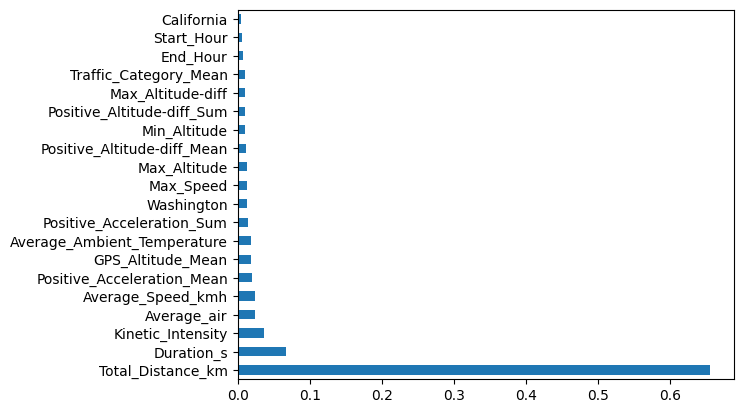

In [94]:
(pd.Series(clf.feature_importances_, index=X_train.columns)
   .nlargest(20)
   .plot(kind='barh')) 

#### 6.1.2 Random Forest Stratified Kfold

In [176]:
#CUSTOM ACCURACY
clf = RandomForestRegressor(n_estimators=700)
cv  = KFold(shuffle=True, random_state=42)

scores = cross_val_score(clf, X_train, y_train, cv=cv, scoring=custom_acc)
print(scores)
print(f'Scores mean: {np.mean(scores):.4f}')

[0.57391813 0.57883041 0.56982456 0.56666667 0.57777778]
Scores mean: 0.5734


In [ ]:
#MEAN SQUARED ERROR
clf = RandomForestRegressor(n_estimators=700)
cv  = KFold(shuffle=True, random_state=42)

scores = cross_val_score(clf, X_train, y_train, cv=cv, scoring=mse)
print(scores)
print(f'Scores mean: {np.mean(scores):.4f}')

### 6.2 XGBoost

#### 6.1.1 XGBoost train test split

In [315]:
params = {
    'learning_rate': [0.1]
    # 'max_depth': [9],
    # 'subsample':[0.9],
    # 'colsample_bytree':[0.9],
    # 'gamma':[0.3]
}

# create an XGB Boost instance
xgb_reg = XGBRegressor(n_estimators = 700)
xgb_reg.fit(X_train, y_train)

# searching the model
# XGB_Model= GridSearchCV(estimator = xgb_reg, param_grid= params, n_jobs = 4, cv = 5, verbose = True, scoring=mse)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=700, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [319]:
predictions = xgb_reg.predict(X_test)
mse_s = mean_squared_error(y_test, predictions)
print('Mse:',mse_s)
df_temp = pd.DataFrame(y_test)
df_temp['predictions'] = predictions.tolist()

accuracy = custom_accuracy(df_temp[ENERGY_NAME],df_temp['predictions'])
print('Accuracy:',accuracy)

Mse: 61.914295821780236
Accuracy: 0.6974789915966386


In [ ]:
df_temp = pd.DataFrame(y_test)
df_temp['predictions'] = predictions.tolist()
df_temp['class'] = df_temp.apply(lambda row: custom_metric(row[ENERGY_NAME],row['predictions']), axis=1)
accuracy = df_temp['class'].value_counts()[1] / df_temp.shape[0]
print('Accuracy is:',accuracy)

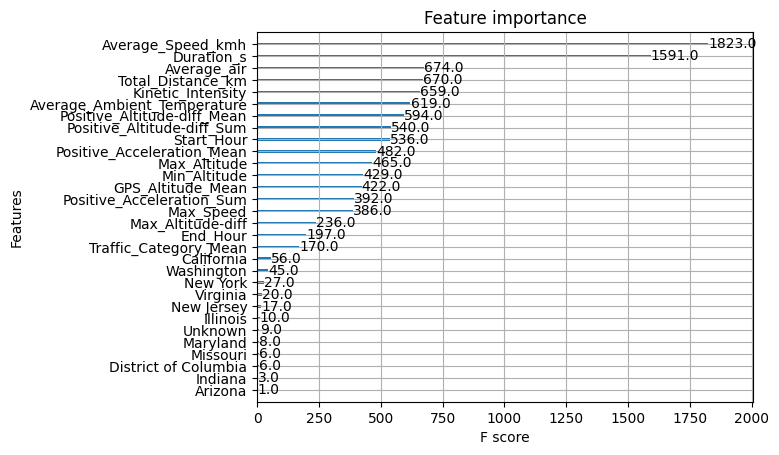

In [65]:
from xgboost import plot_importance
plot_importance(XGB_Model.best_estimator_)
plt.show()

#### 6.1.2 XGBoost Kfold

In [236]:
xgb_reg = XGBRegressor(learning_rate =0.1,
 n_estimators=400,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 nthread=4,
 scale_pos_weight=1,
 seed=27)

# n_estimators: 1000=0.47, 900=0.4657, 800=0.4575,700= , 600= , 500= , 400=

In [237]:
cv  = KFold(shuffle=True, random_state=42)

scores = cross_val_score(xgb_reg, X_train, y_train, cv=cv, scoring=custom_acc)
print(scores)
print(f'Scores mean: {np.mean(scores):.4f}')

[0.41883041 0.4194152  0.41204678 0.40292398 0.41473684]
Scores mean: 0.4136


### 6.4 Extra Trees

#### 6.1.1 Extra Trees Train Test Split

In [611]:
clf = ExtraTreesRegressor(n_estimators= 700)
# parameters = {
#     'n_estimators': [700],
#     # 'max_depth': [34],
#     # 'min_samples_split': [ 21]
# }
# clf = GridSearchCV(clf, parameters, cv=5, verbose=True, scoring=mse)
clf.fit(X_train, y_train)
# clf.best_params_

ExtraTreesRegressor(n_estimators=700)

In [643]:

predictions = clf.predict(X_test)
mse_s = mean_squared_error(y_test, predictions)
print('Mse:',mse_s)
df_temp = pd.DataFrame(y_test)
df_temp['predictions'] = predictions.tolist()

accuracy = custom_accuracy(df_temp[ENERGY_NAME],df_temp['predictions'])
print('Accuracy:',accuracy)
'''
Last week without season %10 without /km
Mse: 52.52781078796234
Accuracy: 0.5994573353293413

error %10, without /km
Mse: 72.30143208431585
Accuracy: 0.6057260479041916

 error %10
Mse: 12701.484965328966
Accuracy: 0.593001497005988

error %15, without /km
Mse: 71.3070574663078
Accuracy: 0.7295097305389222

error %15, without /km,  trips distance > 5 and < 75
Mse: 54.72494776524199
Accuracy: 0.8637015781922525

error %10, without /km  trips distance > 5 and < 75
Mse: 54.72494776524199
Accuracy: 0.763271162123386

error %10, with /km ,  trips distance > 5 and < 75
Mse: 0.16015310259187038
Accuracy: 0.7634761221561795

error %15, with /km , w trips distance > 5 and < 75
Mse: 0.16015310259187038
Accuracy: 0.867595818815331


'''

Mse: 54.72494776524199
Accuracy: 0.763271162123386


'\nLast week without season %10 without /km\nMse: 52.52781078796234\nAccuracy: 0.5994573353293413\n\nerror %10, without /km\nMse: 72.30143208431585\nAccuracy: 0.6057260479041916\n\n error %10\nMse: 12701.484965328966\nAccuracy: 0.593001497005988\n\nerror %15, without /km\nMse: 71.3070574663078\nAccuracy: 0.7295097305389222\n\nerror %15, without /km,  trips distance > 5 and < 75\nMse: 54.72494776524199\nAccuracy: 0.8637015781922525\n\nerror %10, without /km  trips distance > 5 and < 75\nMse: 54.72494776524199\nAccuracy: 0.8637015781922525\n\nerror %10, with /km ,  trips distance > 5 and < 75\nMse: 0.16015310259187038\nAccuracy: 0.7634761221561795\n\nerror %15, with /km , w trips distance > 5 and < 75\nMse: 0.16015310259187038\nAccuracy: 0.867595818815331\n\n\n'

<Axes: >

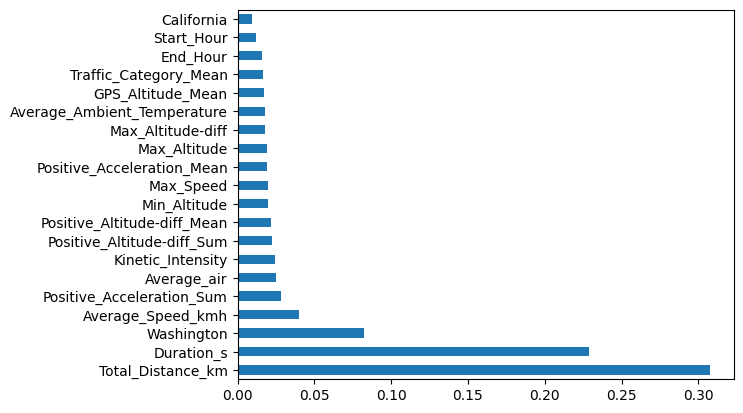

In [644]:
(pd.Series(clf.feature_importances_, index=X_test.columns)
   .nlargest(20)
   .plot(kind='barh')) 

#### 6.1.2 Extra Trees Stratified Kfold

In [120]:
#CUSTOM ACCURACY
clf = ExtraTreesRegressor(n_estimators=700)
cv  = KFold(shuffle=True, random_state=42)

scores = cross_val_score(clf, X, y, cv=cv, scoring=custom_acc)
print(scores)
print(f'Scores mean: {np.mean(scores):.4f}')

'''n_estimator 700: 0.5931      '''

[0.76347612 0.76096761 0.75563756 0.75256253 0.75440754]
Scores mean: 0.7574


'n_estimator 700: 0.5931      '